In [108]:
!pip install -U scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/69/8a/cf17d6443f5f537e099be81535a56ab68a473f9393fbffda38cd19899fc8/scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 9.3/9.3 MB 5.9 MB/s eta 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv(fr"AbandonoEmpleados.csv", sep = ';', index_col = 'id', na_values = '#N/D')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

In [5]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Se eliminan las variables anos_en_puesto y conciliación, debido a su alto número de valores nulos. 

Se hará EDA en las variables sexo, educacion, satisfaccion_trabajo e implicacion, a pesar de tener datos nulos, no son muchos

In [6]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True) #El inplace se usa para que se aplique el cambio directamente al DF

## EDA Variables Categóricas

In [8]:
def graficos_eda_categoricas(cat):
    
    #Calculamos el numnero de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1]/2)
    
    #Definimos el grafico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 16))
    
    #Aplanamos para iterar el grafico
    ax = ax.flat
    
    #Creamos el bucle que va anadiendo cada uno de los graficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)

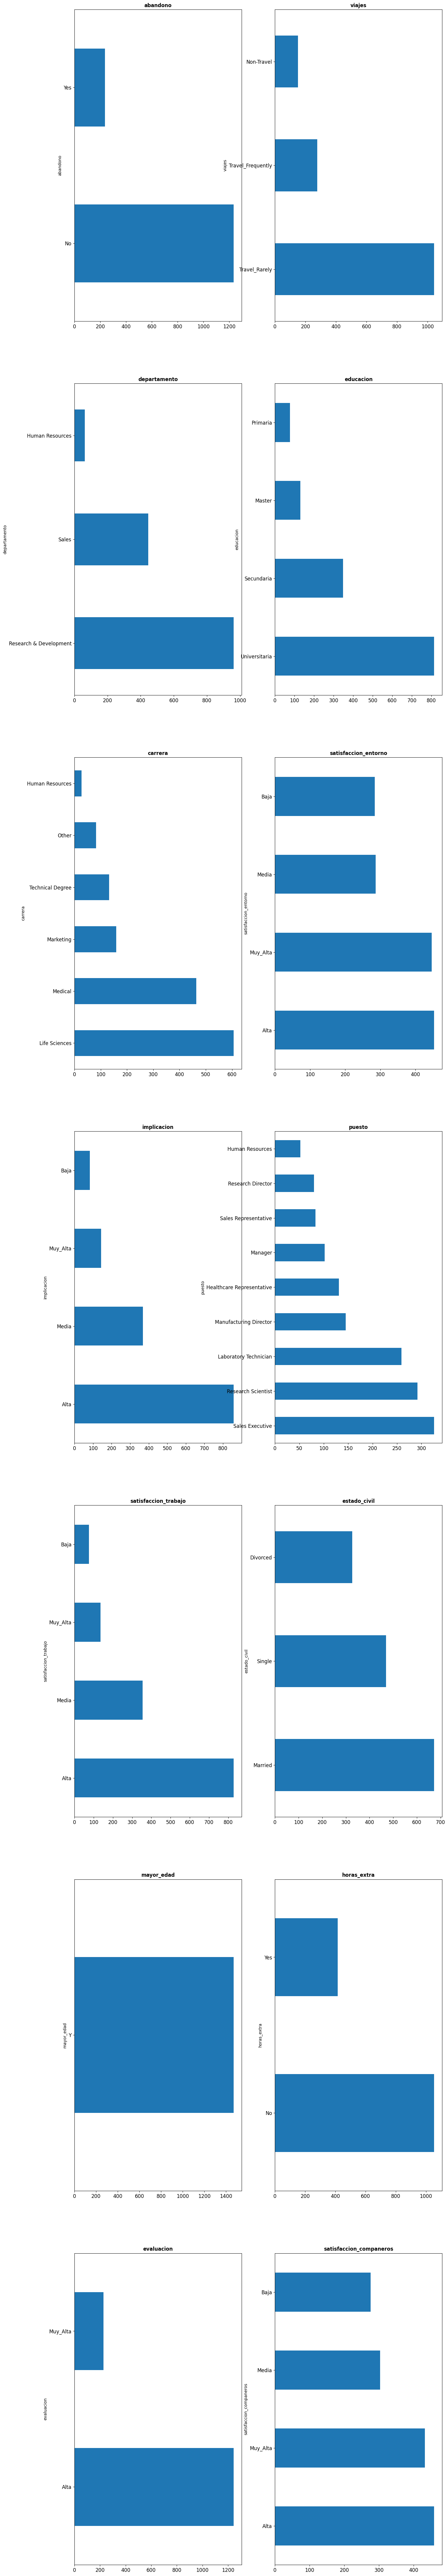

In [9]:
graficos_eda_categoricas(df.select_dtypes('O'))

De acuerdo con estas tablas, se toman algunas decisiones con respecto a las variables con valores nulos o con características relevantes:

* mayor_edad sólo tiene un valor, por lo cual se considera irrelevante y se elimina
* los valores nulos en la variable educación se imputarán por la categoría "universitaria" que corresponde a un alto porcentaje
* En el caso de la variable satisfaccion_trabajo se imputará por "Alta"
* En la variable implicación, se imputará por "alta"

In [10]:
df.drop(columns = 'mayor_edad',inplace = True)

In [11]:
df['educacion'] = df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

## EDA Variables Numéricas

In [36]:
def estadisticos_cont(num):

    #Calcular describe

    estadisticos = num.describe().T

    #añadimos la mediana
    estadisticos['median'] = num.median()

    # Reordenar la posición de la mediana
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

    #devolvemos la funcion
    return(estadisticos)

In [37]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Analizando la tabla anterior, se toman las siguientes decisiones:

* la variable sexo tiene 4 valores diferentes, lo cual es dificil de interpretar, por lo cual, se decide eliminar
* Empleados toma un solo valor, de 1, por lo cual se eliminará
* La variable horas_quincena toma un único valor para todos los casos, de 80, lo cual no ofrece información importante para analizar y por lo tanto se eliminará.

In [40]:
df.drop(columns = ['sexo','empleados','horas_quincena'], inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores   147

## Generación de Insight

### Cuál es la tasa de abandono?

In [46]:
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

### Tipo de empleado que deja la empresa?

In [47]:
#Transformar abandono a numérico
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})


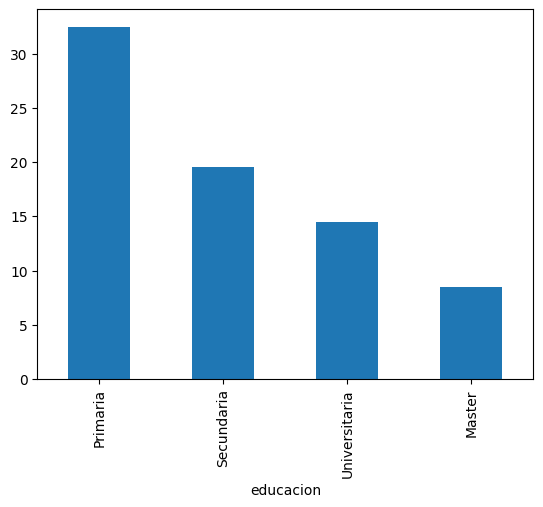

In [72]:
"""
Análisis por educación: se agrupa el tipo de educación y dentro de 
los valores de abandono = 1, se obtienen los porcentajes de los grupos 
de educación
"""
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

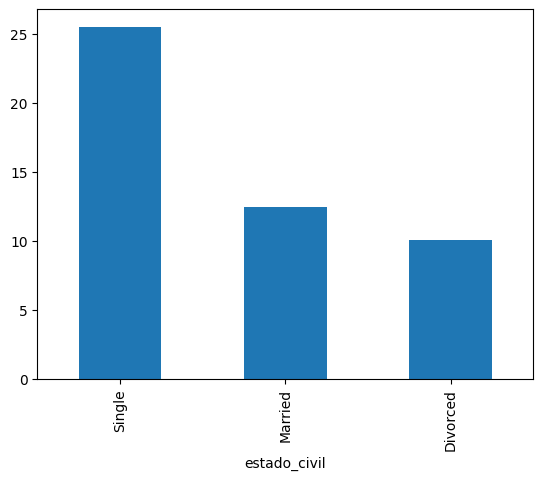

In [71]:
# Análisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

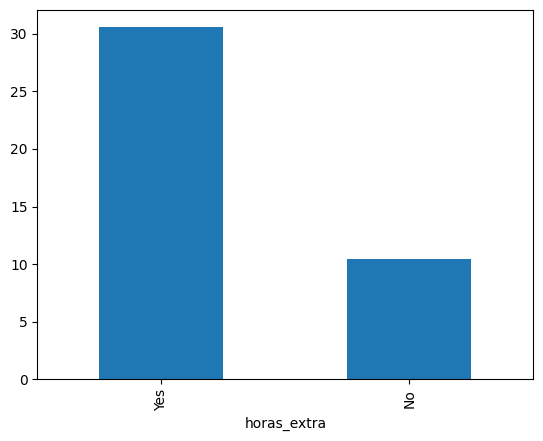

In [70]:
#Análisis de horas extra
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

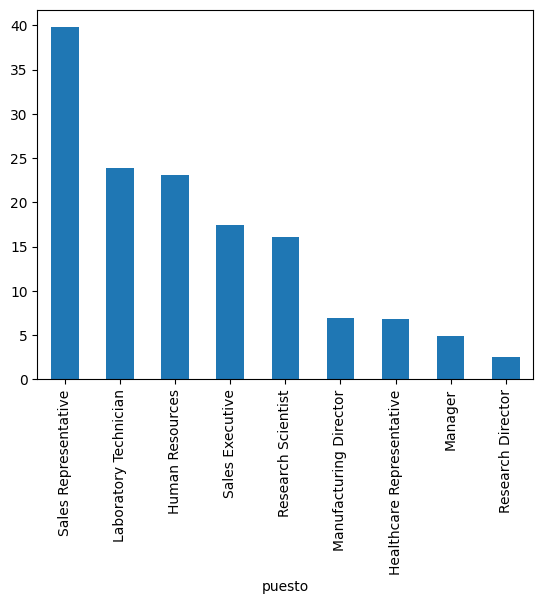

In [69]:
# Análisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

<Axes: xlabel='abandono'>

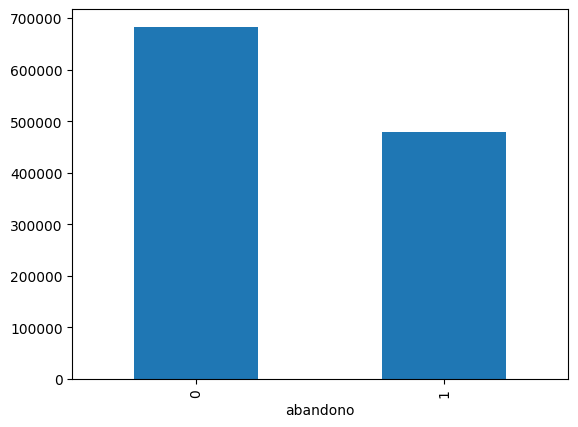

In [73]:
temp = df.groupby('abandono').salario_mes.mean().sort_values(ascending = False) * 100
temp.plot.bar()

### Conclusiones insights:

Los empleados que más abandonan las empresas tienen estas características:

* Bajo nivel educativo
* Solteros
* Trabaja en ventas
* Bajo Salario
* Realizan horas extra

¿Cual es el impacto económico de este problema? Según el estudio "Cost of Turnover" del Center for American Progress:

El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [76]:
# Crear nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes', 'salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [79]:
# Generamos condicionales según el salario anual

#Lista de condiciones

condiciones = [(df['salario_ano'] < 3000),
               (df['salario_ano'] <= 30000) & (df['salario_ano'] < 50000),
               (df['salario_ano'] >= 50000) & (df['salario_ano'] < 75000),
                (df['salario_ano'] >= 75000)]

# Lista de resultados

resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

df['impacto_abandono'] = np.select(condiciones,resultados, default = 0)

In [81]:
costo_total = df.loc[df.abandono == 1].impacto_abandono.sum()
print(fr"El costo de abandono de los empleados el último año ha sido de : {costo_total}")

El costo de abandono de los empleados el último año ha sido de : 2337598.368


In [82]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

338703.588

Cuánto dinero me ahorro al año si evito que mis empleados se vayan?

In [84]:
print(f'Si evito que el 10% de mis empleados se vayan, me ahorraría {int(costo_total * 0.1)}$ cada año')
print(f'Si evito que el 20% de mis empleados se vayan, me ahorraría {int(costo_total * 0.2)}$ cada año')
print(f'Si evito que el 30% de mis empleados se vayan, me ahorraría {int(costo_total * 0.3)}$ cada año')

Si evito que el 10% de mis empleados se vayan, me ahorraría 233759$ cada año
Si evito que el 20% de mis empleados se vayan, me ahorraría 467519$ cada año
Si evito que el 30% de mis empleados se vayan, me ahorraría 701279$ cada año


In [89]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono ==1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado
print(f'El porcentaje que nos ha abandonado del puesto Sales Representative ha sido de {porc_pasado*100:.2f}') 

El porcentaje que nos ha abandonado del puesto Sales Representative ha sido de 39.76


In [95]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

print(f'La cantidad de empleados que abandonarán la empresa del puesto Sales Representative este año son: {se_iran}')

La cantidad de empleados que abandonarán la empresa del puesto Sales Representative este año son: 19


Asumiendo que se quiera retener el 30%, analizamos el costo que se ahorraría la empresa:

In [101]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum() * porc_pasado * 0.3
print(f'Podemos retener {retenemos} representantes de venta y ello podría suponer {int(ahorramos)}$.')

Podemos retener 5 representantes de venta y ello podría suponer 17085$.


## Modelo de Machine Learning

In [102]:
df_ml = df.copy()

In [109]:
# Transformar las variables categóricas a numéricas
from sklearn.preprocessing import OneHotEncoder

#Variables categóricas
cat = df_ml.select_dtypes('O')

#Instanciando
ohe = OneHotEncoder(sparse = False)

#entrenamiento
ohe.fit(cat)

#Aplicamos transformación
cat_ohe = ohe.transform(cat)

#Colocamos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [131]:
num = df.select_dtypes('number').reset_index(drop = True)

In [114]:
df_ml = pd.concat([cat_ohe,num], axis = 1)

In [133]:
# Separación de variables predictoras
x = df_ml.drop(columns = 'abandono')
y = df_ml['abandono']

In [136]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)

### Entrenamiento del modelo

In [137]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar
ac = DecisionTreeClassifier(max_depth = 4)

#Entrenar
ac.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

In [139]:
# Predicción
pred = ac.predict_proba(test_x)[:,1]
pred[:50]

array([0.05202312, 0.08823529, 0.05202312, 0.05202312, 0.05202312,
       0.05202312, 0.58333333, 0.05202312, 0.56818182, 0.05202312,
       0.15384615, 0.05202312, 0.05202312, 0.05202312, 0.05202312,
       0.15384615, 0.05202312, 0.05202312, 0.05202312, 0.        ,
       0.30555556, 0.30555556, 0.6875    , 0.05202312, 0.6875    ,
       0.05202312, 0.15384615, 0.05202312, 0.37837838, 0.15384615,
       0.15384615, 0.37837838, 0.05202312, 0.05202312, 0.05202312,
       0.05202312, 0.05202312, 0.05202312, 0.56818182, 0.05202312,
       0.05202312, 0.15384615, 0.08823529, 1.        , 0.        ,
       0.05202312, 0.08823529, 0.08823529, 0.24242424, 0.05202312])

In [144]:
#Evaluar
from sklearn.metrics import roc_auc_score

eva = roc_auc_score(test_y,pred)
print(f'El porcentaje de evaluación de mi modelo es {eva*100}')

El porcentaje de evaluación de mi modelo es 67.74140752864157


[Text(0.45535714285714285, 0.9, 'node #0\nhoras_extra_Yes <= 0.5\nsamples = 100.0%\nvalue = [0.83, 0.17]'),
 Text(0.19642857142857142, 0.7, 'node #1\nanos_experiencia <= 2.5\nsamples = 71.2%\nvalue = [0.89, 0.11]'),
 Text(0.10714285714285714, 0.5, 'node #2\nedad <= 31.5\nsamples = 5.6%\nvalue = [0.66, 0.34]'),
 Text(0.07142857142857142, 0.3, 'node #3\nviajes_Travel_Frequently <= 0.5\nsamples = 4.2%\nvalue = [0.53, 0.47]'),
 Text(0.03571428571428571, 0.1, 'node #4\nsamples = 3.6%\nvalue = [0.62, 0.38]'),
 Text(0.10714285714285714, 0.1, 'node #5\nsamples = 0.6%\nvalue = [0.0, 1.0]'),
 Text(0.14285714285714285, 0.3, 'node #6\nsamples = 1.5%\nvalue = [1.0, 0.0]'),
 Text(0.2857142857142857, 0.5, 'node #7\nnum_empresas_anteriores <= 4.5\nsamples = 65.6%\nvalue = [0.92, 0.08]'),
 Text(0.21428571428571427, 0.3, 'node #8\nanos_experiencia <= 39.0\nsamples = 50.5%\nvalue = [0.95, 0.05]'),
 Text(0.17857142857142858, 0.1, 'node #9\nsamples = 50.4%\nvalue = [0.95, 0.05]'),
 Text(0.25, 0.1, 'node #1

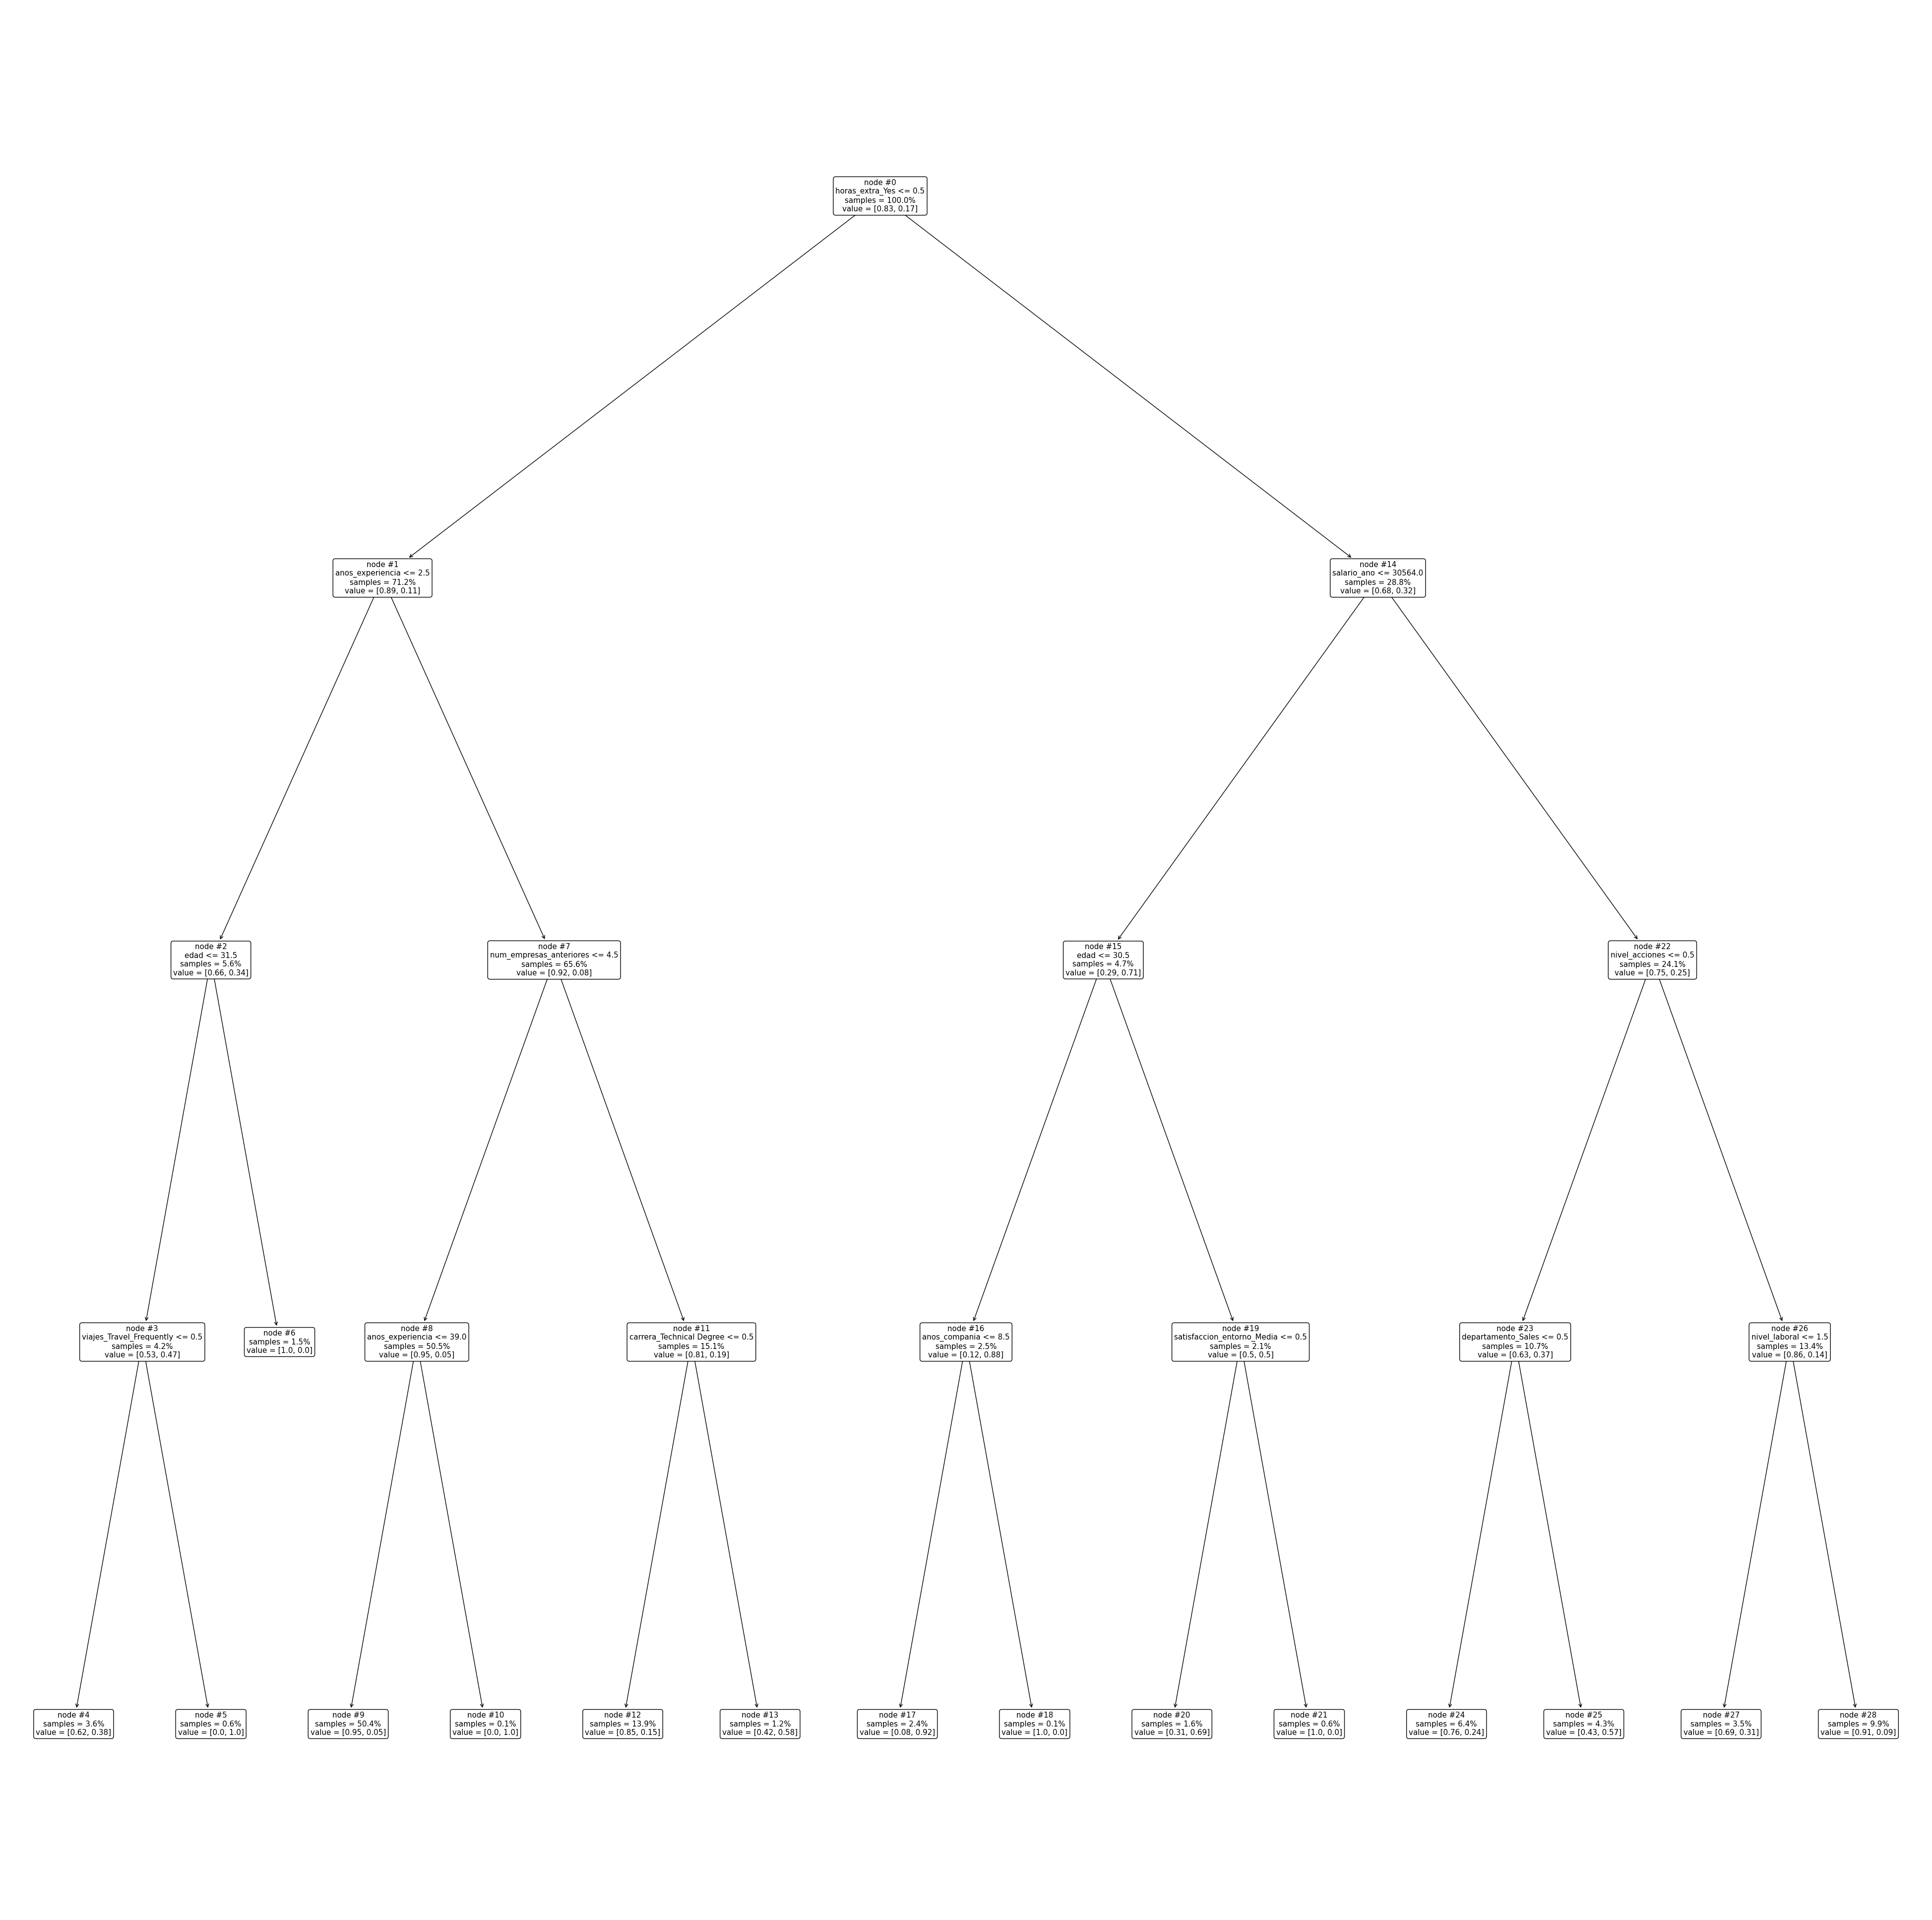

In [146]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names = test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2)

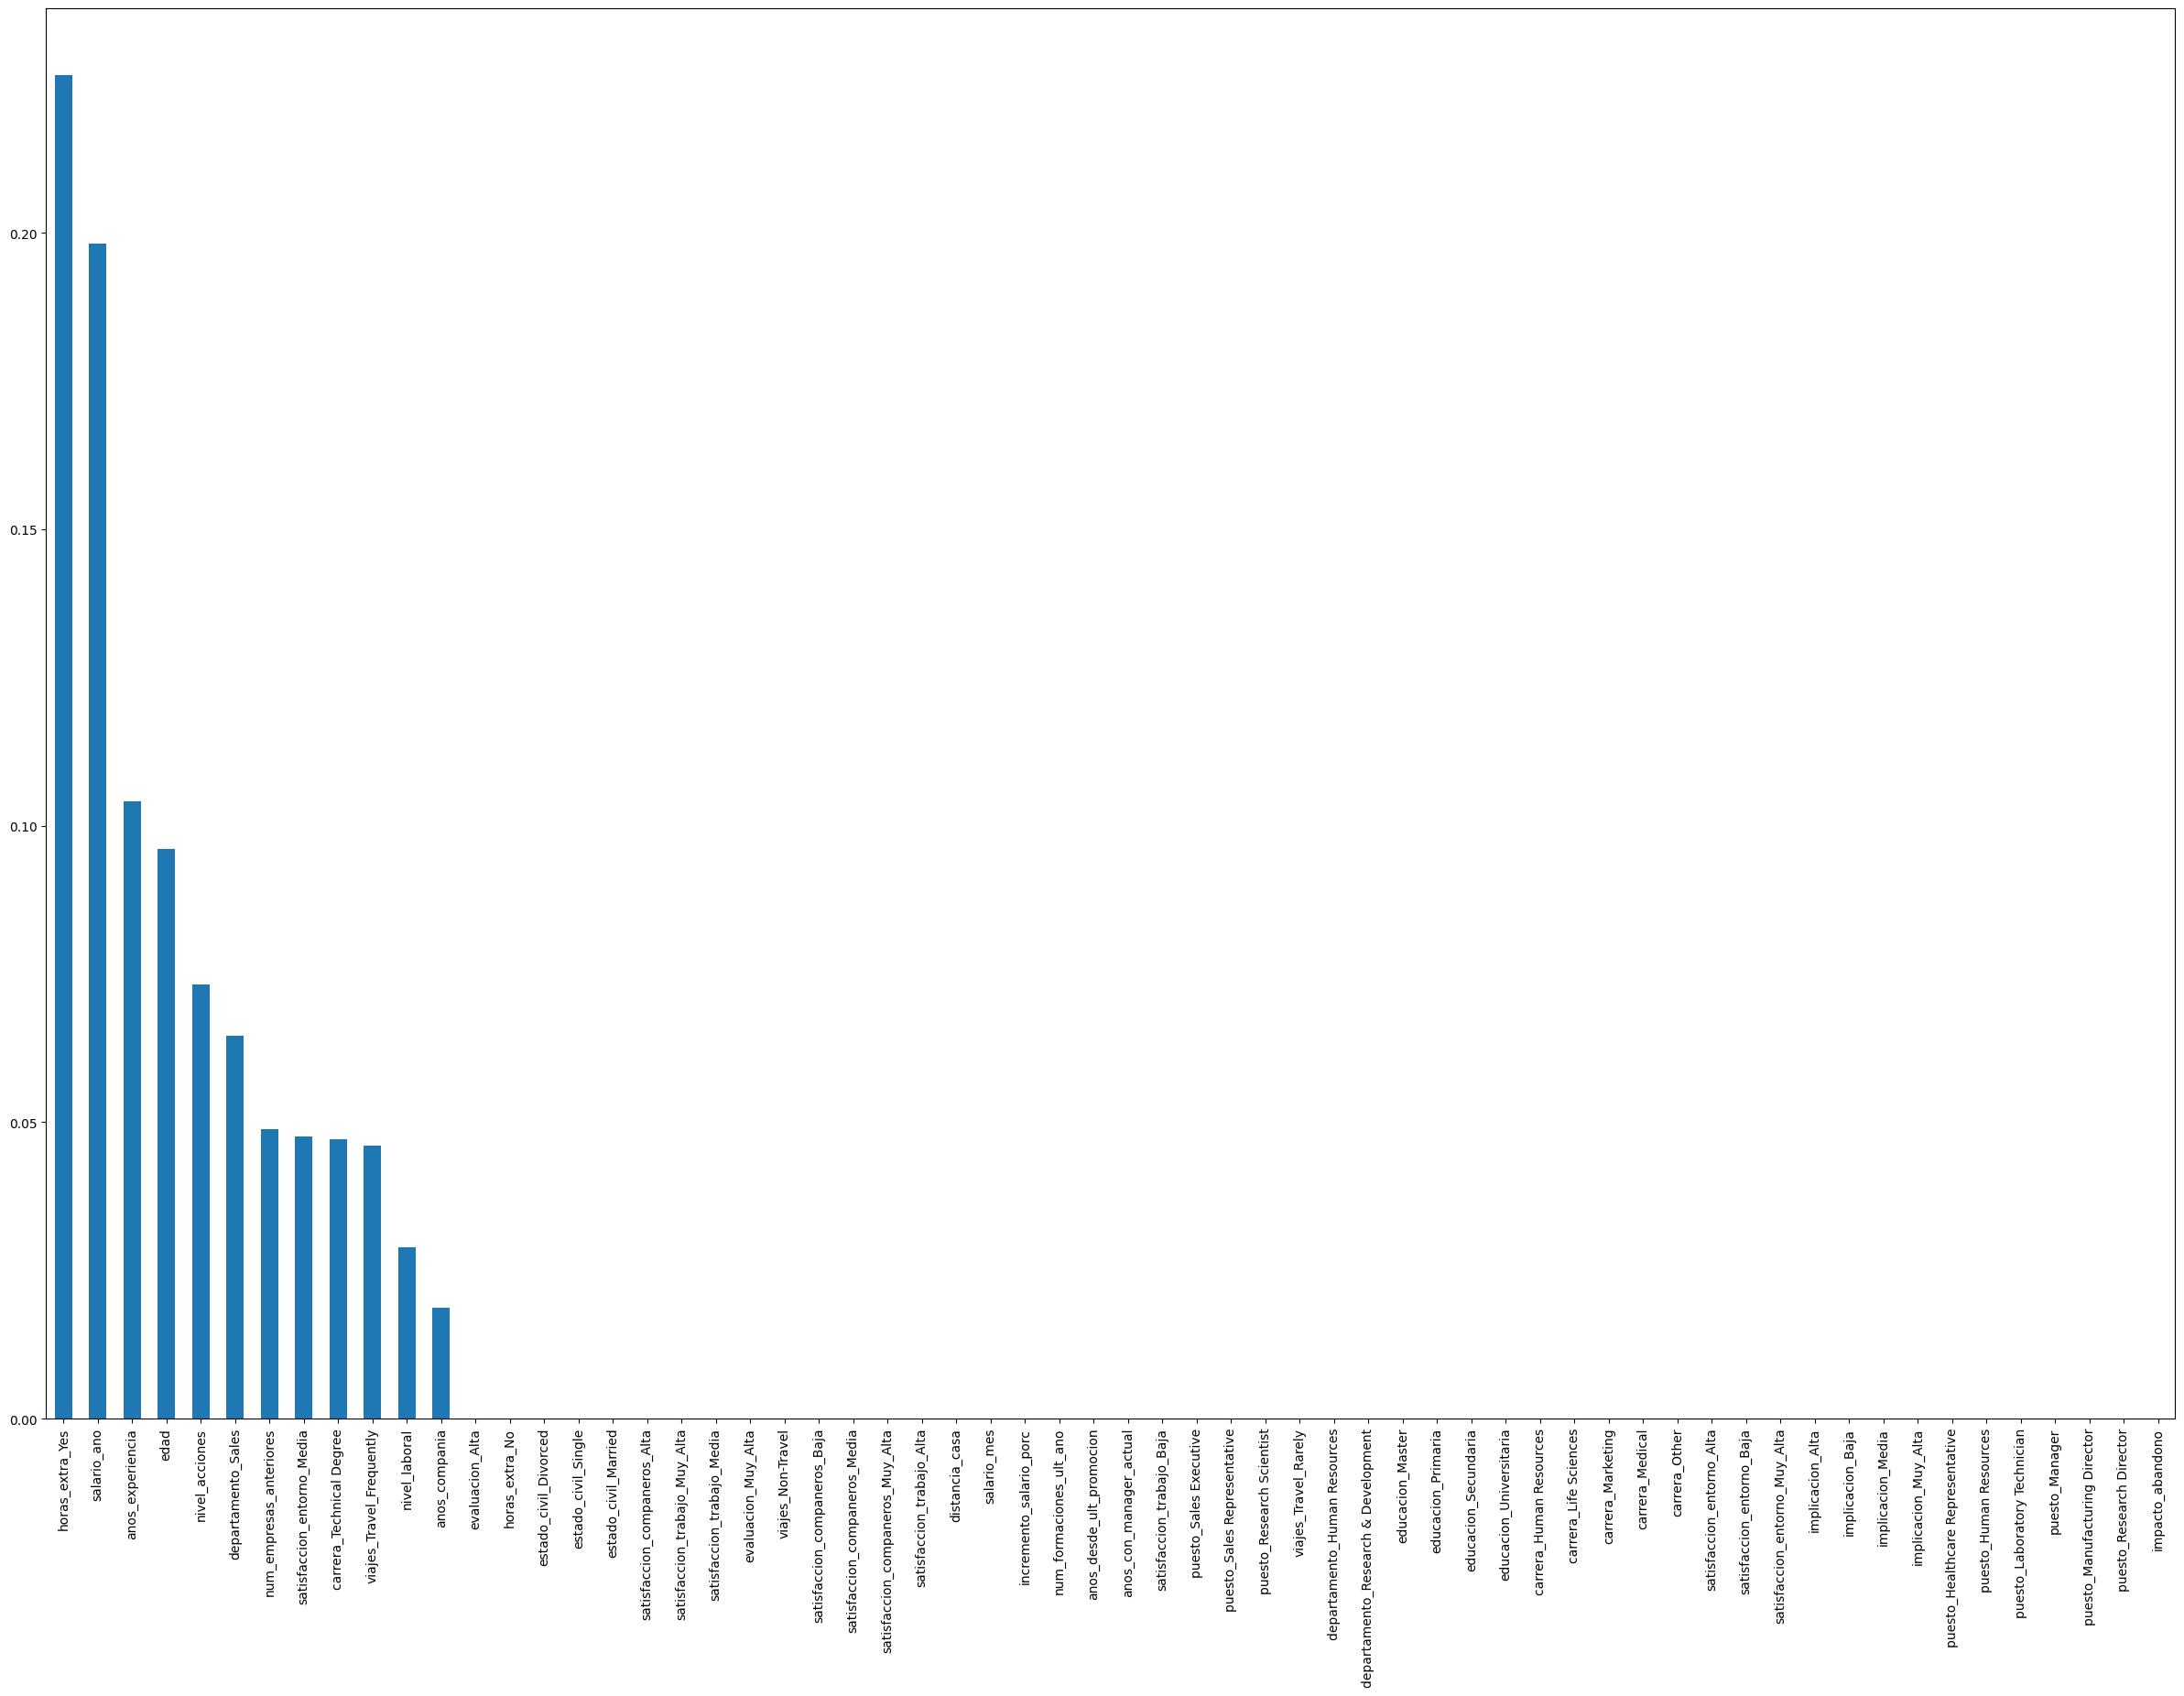

In [148]:
pd.Series(ac.feature_importances_, index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

In [149]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:,1]

In [150]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.568182
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.052023
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4940.760,0.687500
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,0.000,0.242424
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,0.000,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,0.000,0.052023
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.052023
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.088235


In [156]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1160,31,1,Travel_Frequently,Research & Development,15,Universitaria,Medical,Alta,Alta,1,...,Alta,1,2,5,2,2,2,31320,0.000,1.0
648,30,1,Travel_Frequently,Sales,12,Secundaria,Life Sciences,Media,Media,1,...,Alta,1,1,2,1,0,0,24396,4806.012,1.0
1111,28,1,Travel_Frequently,Research & Development,1,Secundaria,Medical,Baja,Media,1,...,Baja,2,1,2,1,0,0,31152,0.000,1.0
1928,29,1,Travel_Frequently,Sales,24,Universitaria,Technical Degree,Alta,Muy_Alta,1,...,Muy_Alta,0,1,3,1,0,0,13092,2579.124,1.0
399,31,0,Travel_Frequently,Sales,5,Universitaria,Marketing,Muy_Alta,Alta,1,...,Alta,1,2,5,2,2,2,33468,0.000,1.0
235,19,1,Travel_Frequently,Sales,1,Primaria,Technical Degree,Alta,Baja,1,...,Baja,0,1,5,0,0,0,27900,5496.300,1.0
1944,27,1,Travel_Frequently,Human Resources,22,Secundaria,Human Resources,Baja,Media,1,...,Baja,0,1,2,1,0,0,34356,0.000,1.0
1279,21,1,Travel_Frequently,Research & Development,10,Secundaria,Life Sciences,Baja,Media,1,...,Alta,0,2,2,2,2,2,31500,0.000,1.0
2023,23,1,Travel_Frequently,Sales,9,Universitaria,Marketing,Muy_Alta,Alta,1,...,Baja,1,1,3,1,1,0,21480,4231.560,1.0


In [157]:
df.to_excel('abandono_con_scoring2.xlsx')